In [1]:
import requests
site = "https://query1.finance.yahoo.com/v7/finance/download/2330.TW?period1=0&period2=1549258857&interval=1d&events=history&crumb=hP2rOschxO0"
response = requests.post(site)
print(response.text)
with open('file.csv', 'w') as f:
    f.writelines(response.text)


Date,Open,High,Low,Close,Adj Close,Volume
2000-01-04,69.649002,69.649002,68.475197,69.649002,37.690960,200662321971
2000-01-05,69.649002,71.214104,68.866302,71.214104,38.537937,402466776297
2000-01-06,70.822899,71.214104,69.649002,69.649002,37.690960,197545701266
2000-01-07,67.301300,68.475197,66.518600,67.692497,36.632195,235270327441
2000-01-10,69.649002,70.431396,68.475197,70.040199,37.902672,276171665217
2000-01-11,70.822899,71.605202,68.475197,68.866302,37.267403,277769524211
2000-01-12,69.257500,70.822899,68.866302,70.822899,38.326225,216246790710
2000-01-13,70.822899,70.822899,69.649002,69.649002,37.690960,147490943364
2000-01-14,70.431396,72.387901,70.040199,71.214104,38.537937,288318943138
2000-01-17,74.344398,74.344398,73.170601,73.170601,39.596703,155256929295
2000-01-18,73.170601,73.170601,71.605202,71.996696,38.961433,131648021903
2000-01-19,71.996696,73.170601,71.605202,71.996696,38.961433,134848678139
2000-01-20,71.996696,71.996696,70.822899,71.214104,38.537937,125758111

In [2]:
import pandas as pd 
df=pd.read_csv('file.csv',index_col='Date',parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,69.649002,69.649002,68.475197,69.649002,37.690960,2.006623e+11
2000-01-05,69.649002,71.214104,68.866302,71.214104,38.537937,4.024668e+11
2000-01-06,70.822899,71.214104,69.649002,69.649002,37.690960,1.975457e+11
2000-01-07,67.301300,68.475197,66.518600,67.692497,36.632195,2.352703e+11
2000-01-10,69.649002,70.431396,68.475197,70.040199,37.902672,2.761717e+11


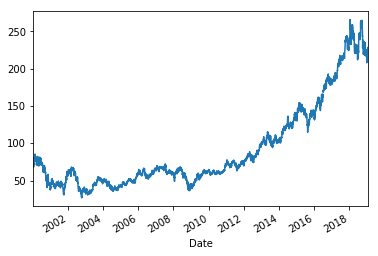

In [4]:
df.Close.plot()

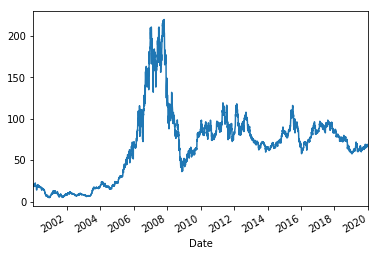

In [5]:
import io
import requests
import datetime
import pandas as pd

def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"

    response = requests.post(url)

    f = io.StringIO(response.text)
    df = pd.read_csv(f, index_col='Date', parse_dates=['Date'] )

    return df
df = crawl_price("2354.TW")
df.Close.plot()


In [6]:
url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

import io
f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]
dfs[0]


,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,3230.78,9.49,+0.29%,1.3B,NaN,NaN,NaN
1,^DJI,Dow 30,28538.44,76.30,+0.27%,193M,NaN,NaN,NaN
2,^IXIC,Nasdaq,8972.60,26.61,+0.30%,2B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),13913.03,36.88,+0.27%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2552.56,8.64,+0.34%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100 Price Return,12801.90,-140.27,-1.08%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1668.47,4.32,+0.26%,0,NaN,NaN,NaN
7,^VIX,Vix,13.78,-1.04,-7.02%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,7542.44,-44.61,-0.59%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,13249.01,-88.10,-0.66%,0,NaN,NaN,NaN


In [7]:
import time
world_index_history = {}
for symbol, name in zip(world_index['Symbol'], world_index['Name']):
    
    print(name)
    
    world_index_history[name] = crawl_price(symbol)
    time.sleep(5)


S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


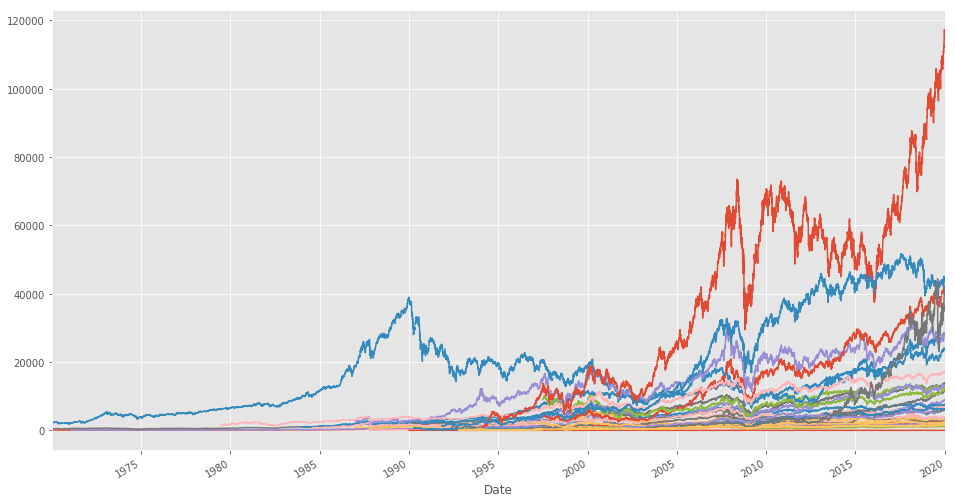

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
for name,history in world_index_history.items():
    history.Close.plot()


In [9]:
print(world_index_history['S&P 500'].head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1970-01-02  92.059998  93.540001  91.790001  93.000000  93.000000   8050000
1970-01-05  93.000000  94.250000  92.529999  93.459999  93.459999  11490000
1970-01-06  93.459999  93.809998  92.129997  92.820000  92.820000  11460000
1970-01-07  92.820000  93.379997  91.930000  92.629997  92.629997  10010000
1970-01-08  92.629997  93.470001  91.989998  92.680000  92.680000  10670000


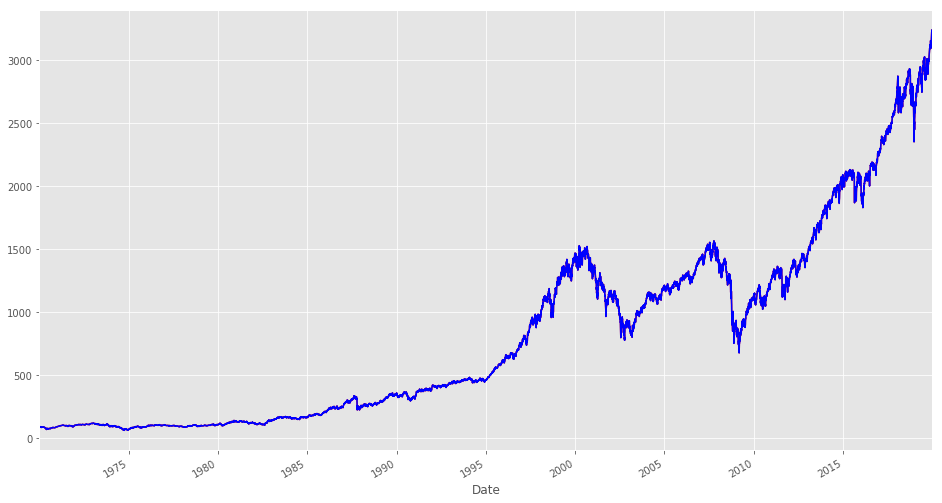

In [10]:
sp500 = world_index_history['S&P 500']
sp500['Close'].plot(color='red')
sp500['Adj Close'].plot(color='blue')


In [11]:
adjclose = {}
for name, price in world_index_history.items():
    if price.index.is_unique:
        adjclose[name] = price['Adj Close']
    
adjclose = pd.DataFrame(adjclose)
adjclose


,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,93.000000,NaN,NaN,550.890015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,553.640015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,92.820000,NaN,NaN,549.830017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,92.629997,NaN,NaN,548.989990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,92.680000,NaN,NaN,549.409973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09,92.400002,NaN,NaN,547.929993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-12,91.699997,NaN,NaN,543.599976,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-13,91.919998,NaN,NaN,543.909973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-14,91.650002,NaN,NaN,542.859985,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
corr = adjclose.corr()
print(corr)

                            S&P 500    Dow 30    Nasdaq  NYSE COMPOSITE (DJ)  \
S&P 500                    1.000000  0.995796  0.980737             0.983242   
Dow 30                     0.995796  1.000000  0.974000             0.977257   
Nasdaq                     0.980737  0.974000  1.000000             0.935380   
NYSE COMPOSITE (DJ)        0.983242  0.977257  0.935380             1.000000   
NYSE AMEX COMPOSITE INDEX  0.731732  0.773613  0.682318             0.880879   
Cboe UK 100 Price Return   0.902329  0.890184  0.880614             0.946857   
Russell 2000               0.972879  0.980700  0.958406             0.963581   
Vix                       -0.197970 -0.185310 -0.213245            -0.184419   
FTSE 100                   0.923624  0.911758  0.854289             0.954818   
DAX PERFORMANCE-INDEX      0.976637  0.970204  0.957205             0.968444   
CAC 40                     0.785862  0.758061  0.721210             0.822008   
ESTX 50 PR.EUR             0.725028  0.6

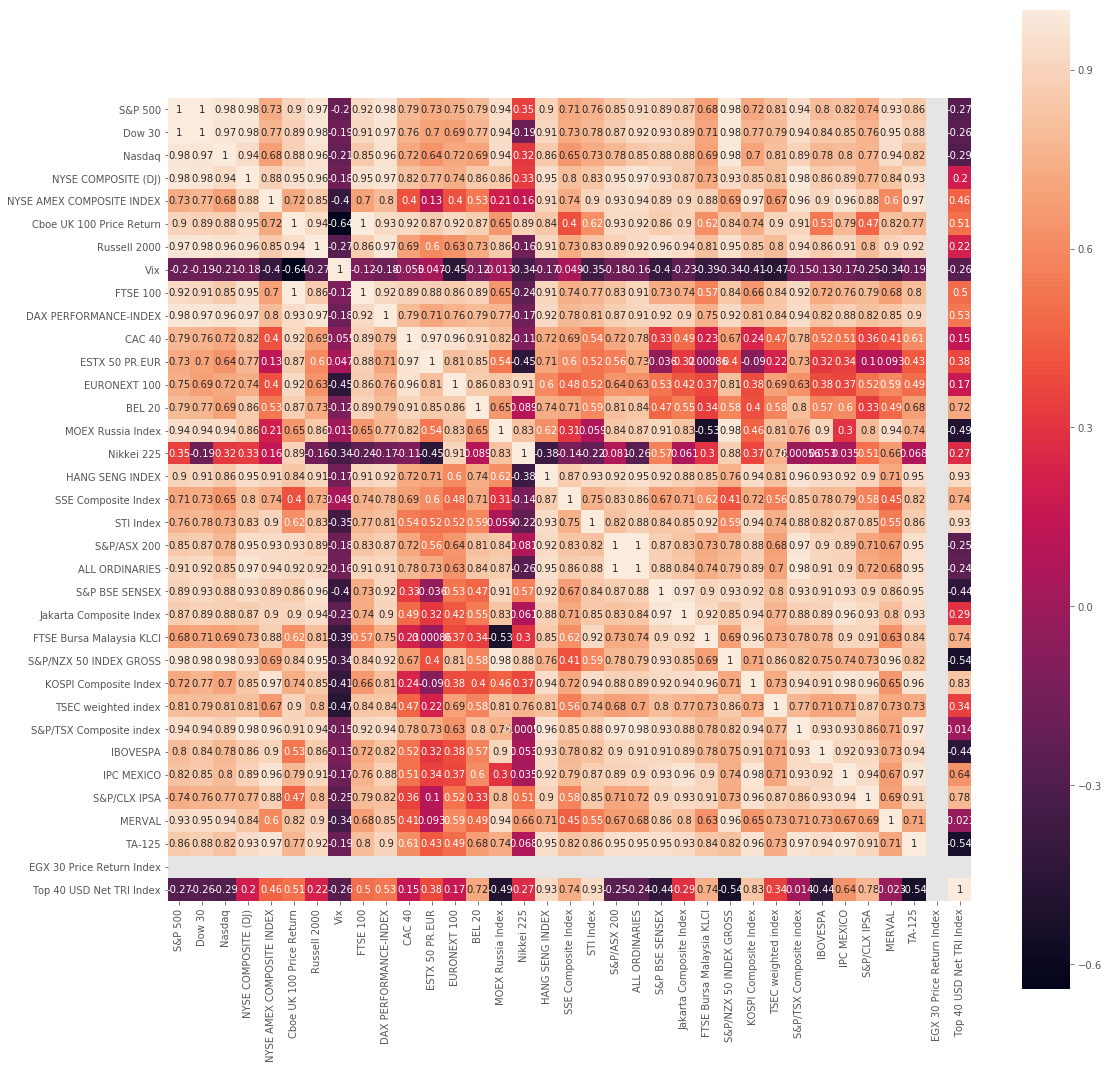

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white',annot=True)

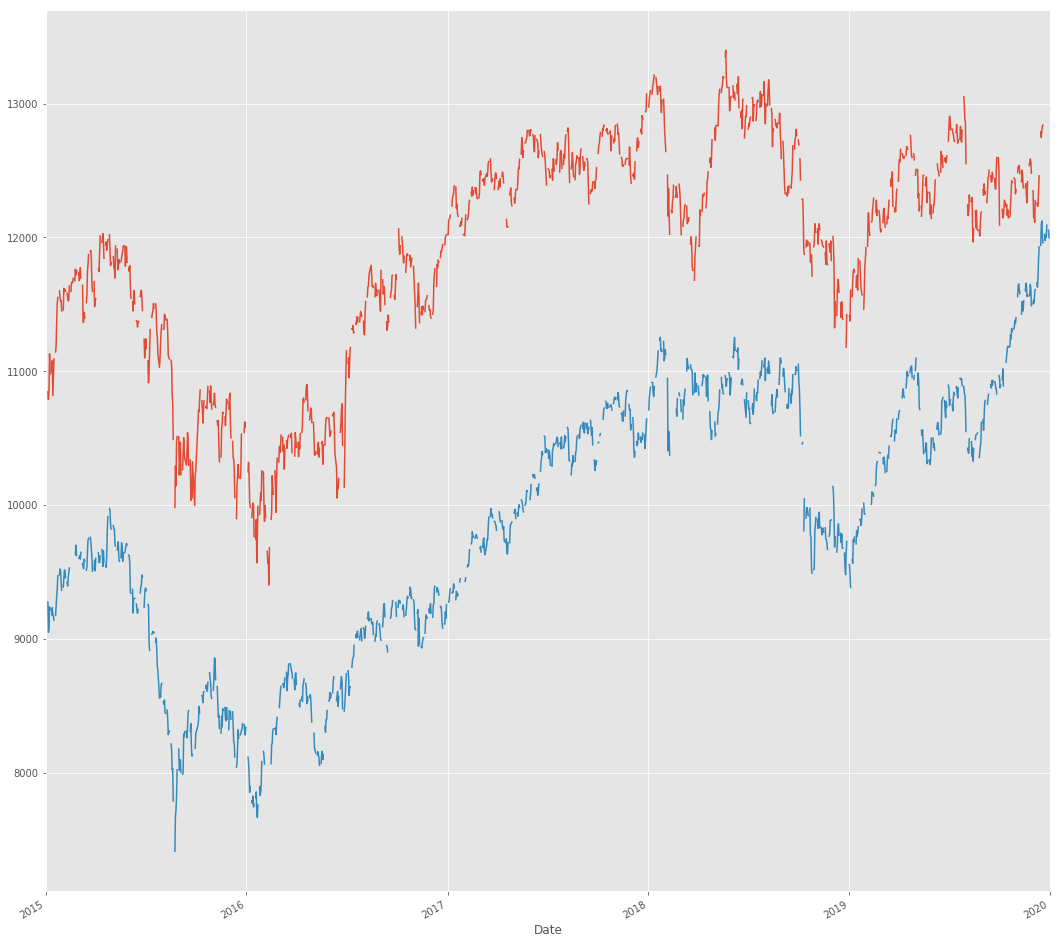

In [27]:
adjclose['Cboe UK 100 Price Return']['2015':].plot()
adjclose['TSEC weighted index']['2015':].plot()

In [28]:
pct_change = adjclose.pct_change()
profit = pct_change.mean()
profit.sort_values()

EGX 30 Price Return Index    0.000000
Top 40 USD Net TRI Index     0.000088
EURONEXT 100                 0.000089
TSEC weighted index          0.000117
FTSE Bursa Malaysia KLCI     0.000117
Cboe UK 100 Price Return     0.000144
BEL 20                       0.000185
STI Index                    0.000198
CAC 40                       0.000204
ESTX 50 PR.EUR               0.000213
S&P/ASX 200                  0.000216
Nikkei 225                   0.000230
S&P/TSX Composite index      0.000235
FTSE 100                     0.000236
NYSE AMEX COMPOSITE INDEX    0.000250
ALL ORDINARIES               0.000251
KOSPI Composite Index        0.000266
NYSE COMPOSITE (DJ)          0.000269
S&P 500                      0.000294
S&P/CLX IPSA                 0.000294
Russell 2000                 0.000301
TA-125                       0.000324
Jakarta Composite Index      0.000328
DAX PERFORMANCE-INDEX        0.000344
Dow 30                       0.000344
HANG SENG INDEX              0.000349
S&P/NZX 50 I

In [30]:
risk=pct_change.std()
sharpe = profit / risk * (252 ** 0.5)
sharpe.sort_values()

Top 40 USD Net TRI Index     0.103149
EURONEXT 100                 0.121788
TSEC weighted index          0.151875
FTSE Bursa Malaysia KLCI     0.165325
CAC 40                       0.263928
KOSPI Composite Index        0.277529
Cboe UK 100 Price Return     0.282297
ESTX 50 PR.EUR               0.284500
BEL 20                       0.289964
STI Index                    0.293156
Nikkei 225                   0.305398
HANG SENG INDEX              0.379227
FTSE 100                     0.379680
S&P/ASX 200                  0.406956
Russell 2000                 0.410201
Jakarta Composite Index      0.413418
NYSE AMEX COMPOSITE INDEX    0.422587
S&P/TSX Composite index      0.428094
SSE Composite Index          0.430161
DAX PERFORMANCE-INDEX        0.433168
NYSE COMPOSITE (DJ)          0.450120
Vix                          0.455901
ALL ORDINARIES               0.455965
TA-125                       0.465392
S&P 500                      0.475688
S&P BSE SENSEX               0.493769
Nasdaq      

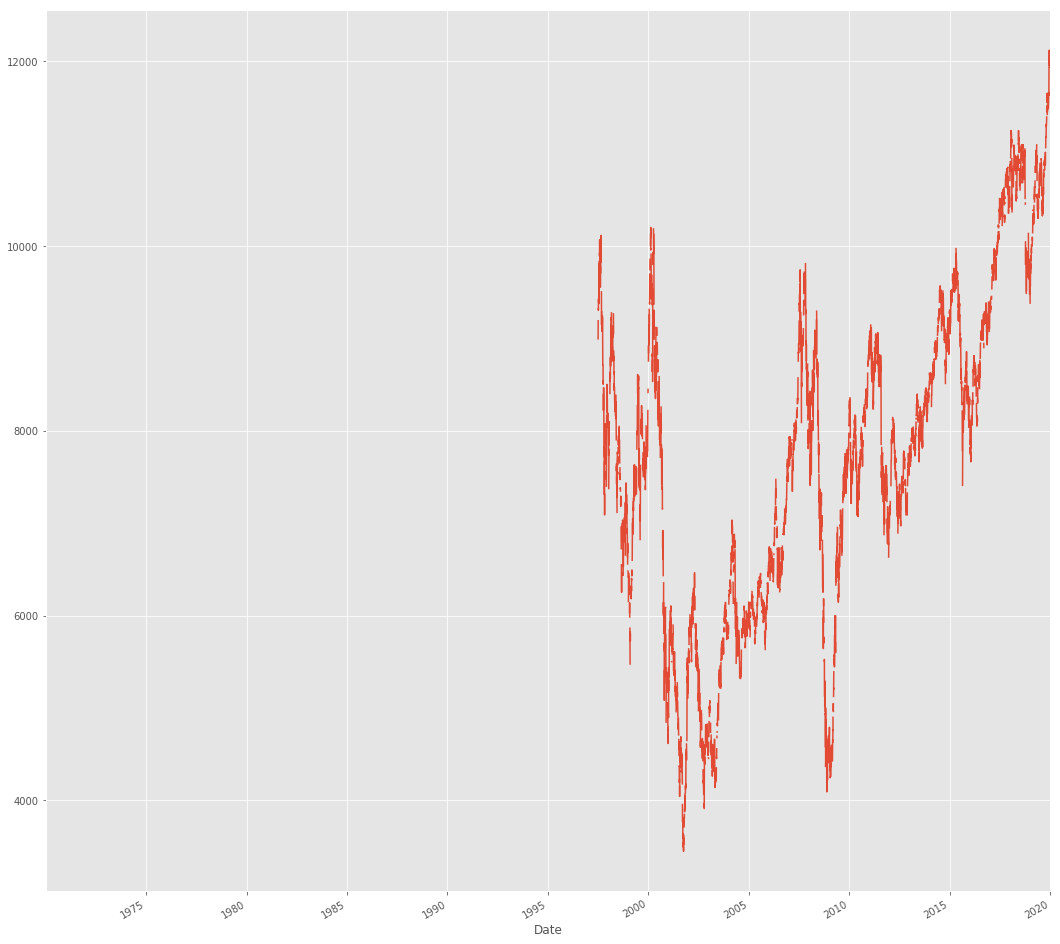

In [31]:
adjclose['TSEC weighted index'].plot()

In [40]:
profit = pct_change.rolling(252).mean()
risk = pct_change.rolling(252).std()
sharpe = profit / risk * (252 ** 0.5)


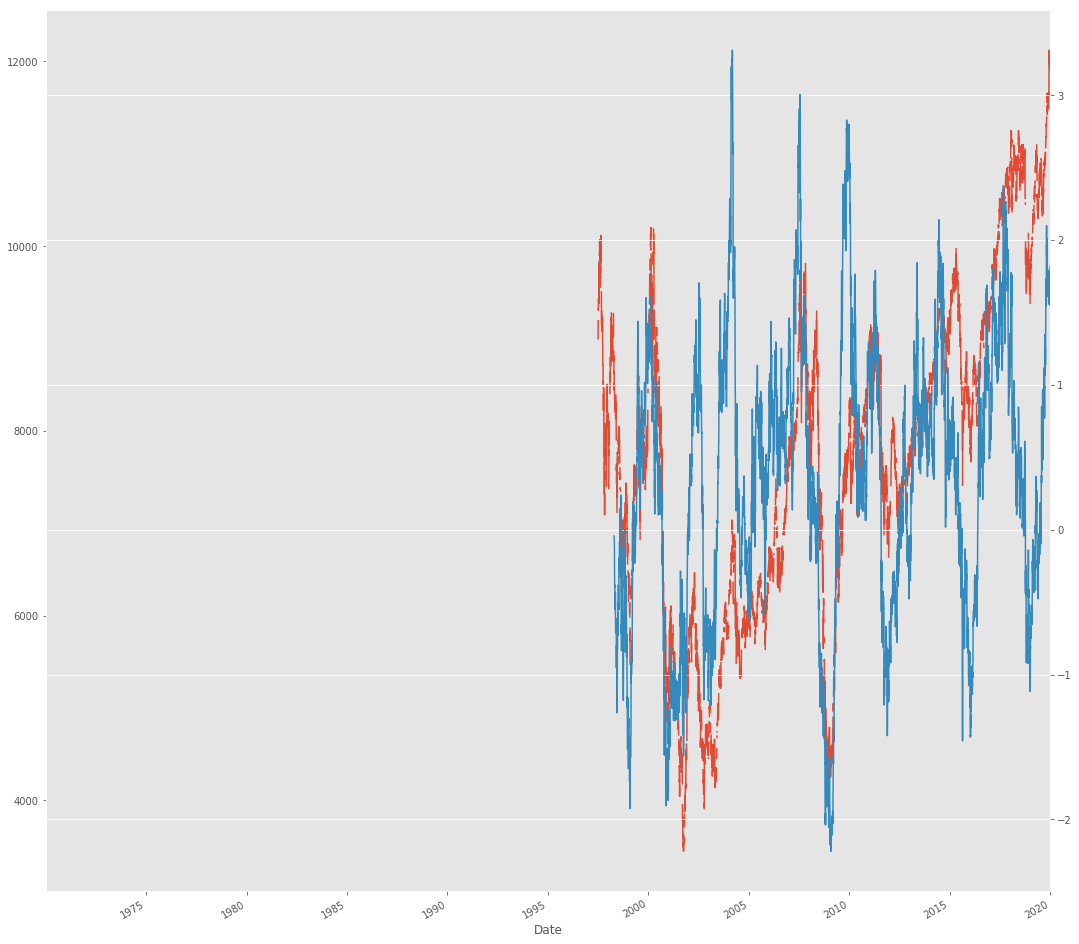

In [41]:
adjclose['TSEC weighted index'].plot()
sharpe['TSEC weighted index'].plot(secondary_y=True)

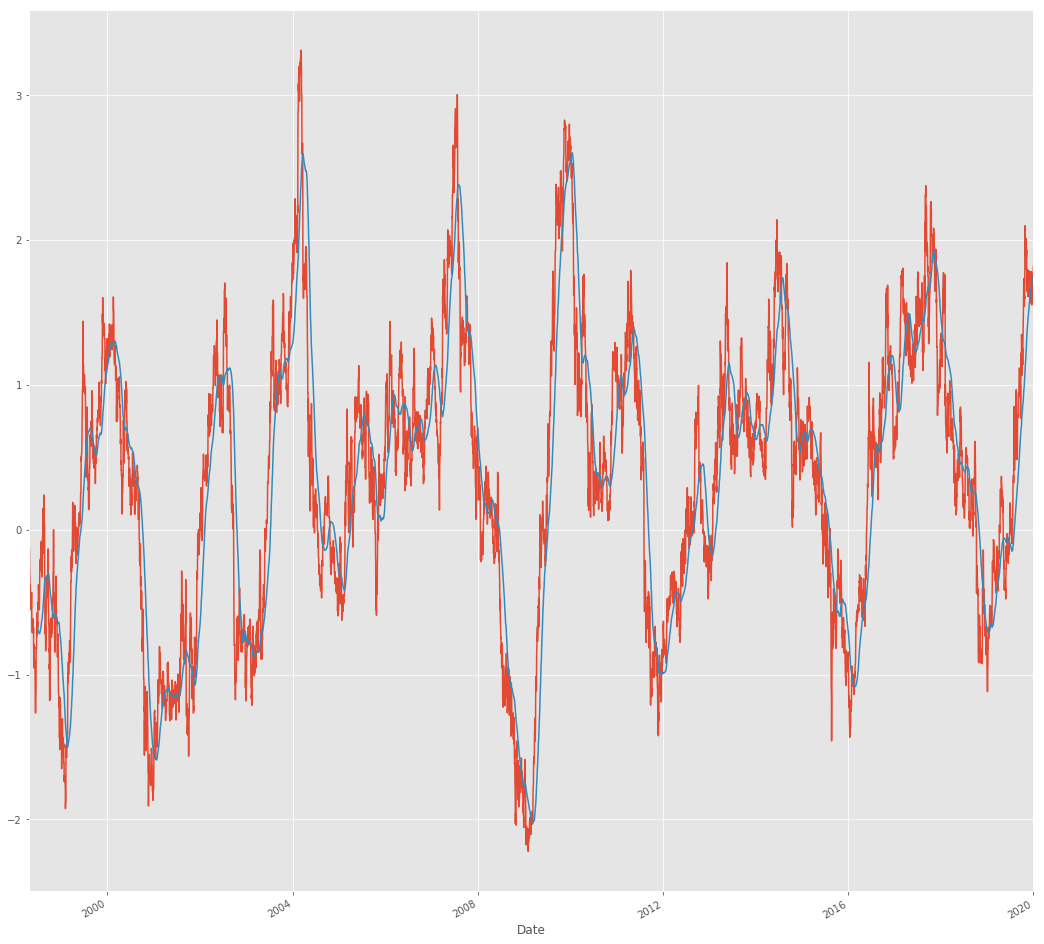

In [35]:
sr = sharpe['TSEC weighted index'].dropna()
d = 60
srsma = sr.rolling(d).mean()
sr.plot()
srsma.plot()


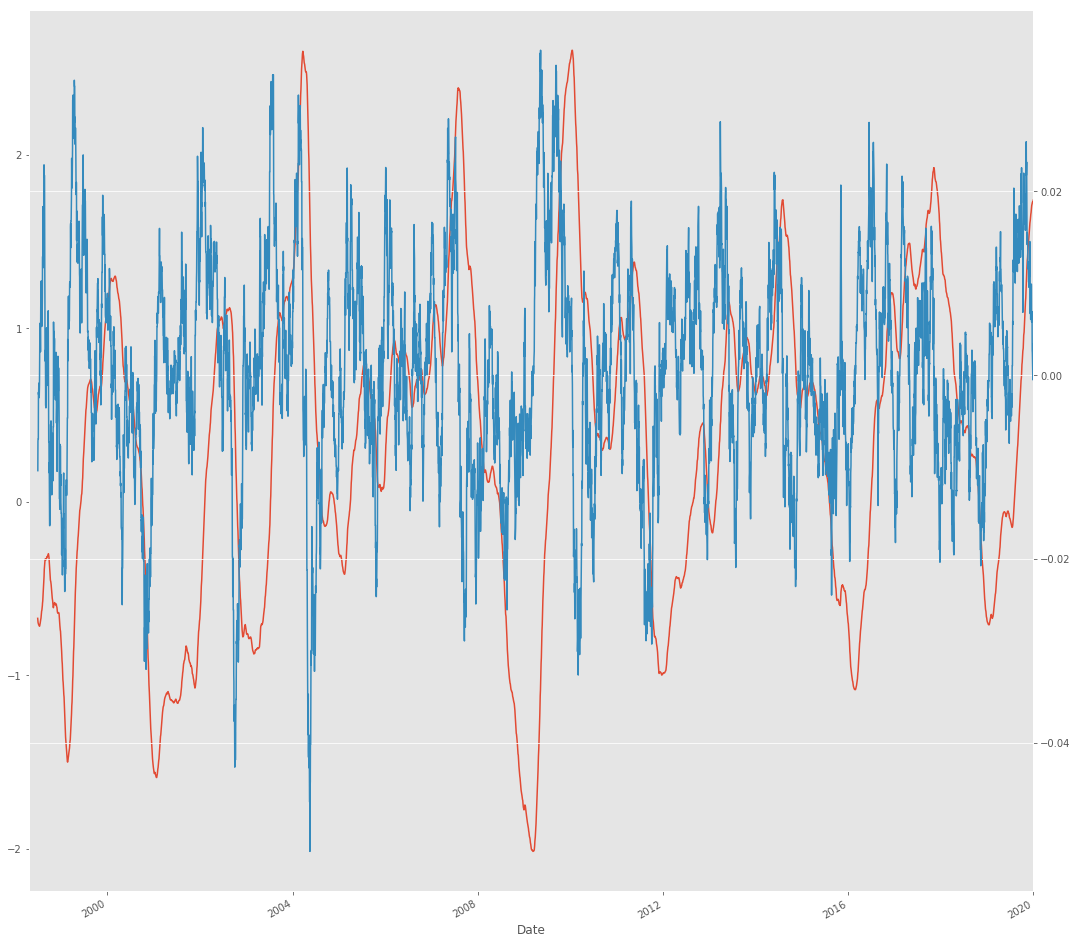

In [37]:
srsma = sr.rolling(d).mean()
srsmadiff = srsma.diff()
srsma.plot()
srsmadiff.plot(secondary_y=True)

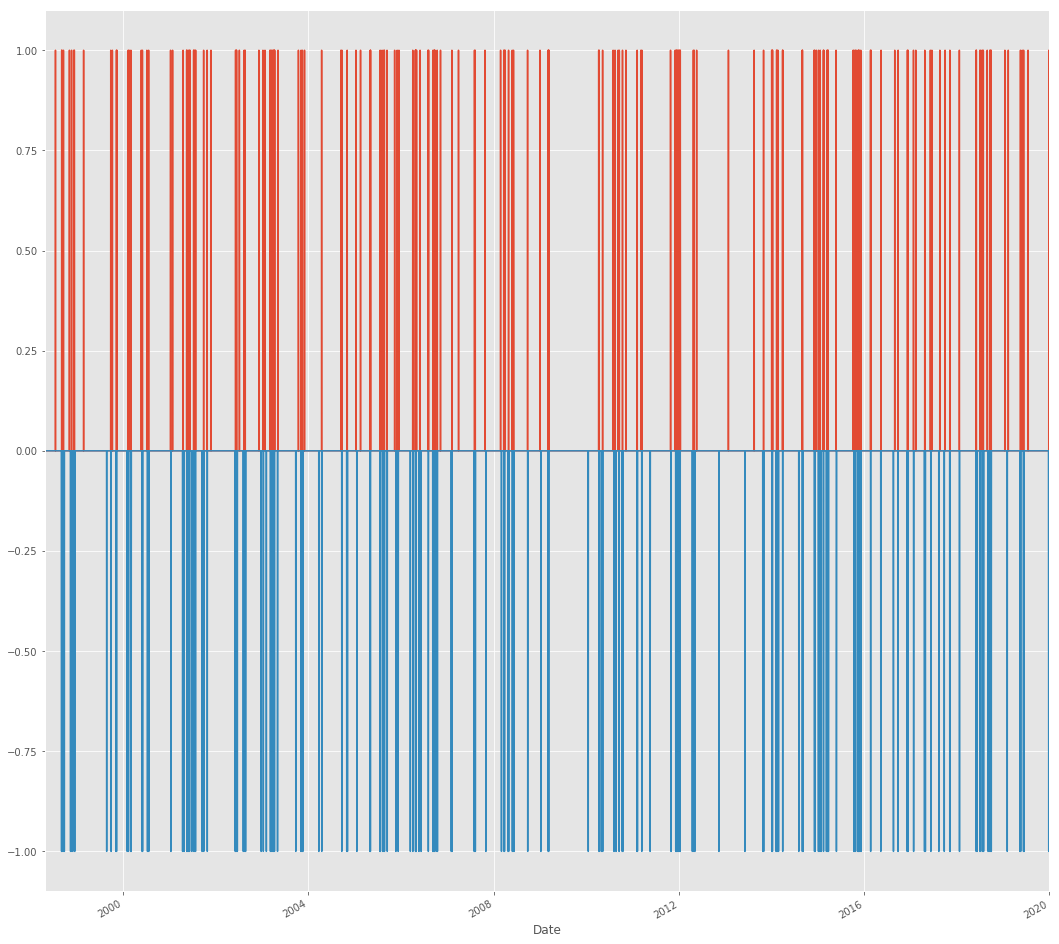

In [42]:
buy = (srsmadiff > 0) & (srsmadiff.shift() < 0)
sell = (srsmadiff < 0) & (srsmadiff.shift() > 0)
(buy * 1).plot()
(sell * -1).plot()

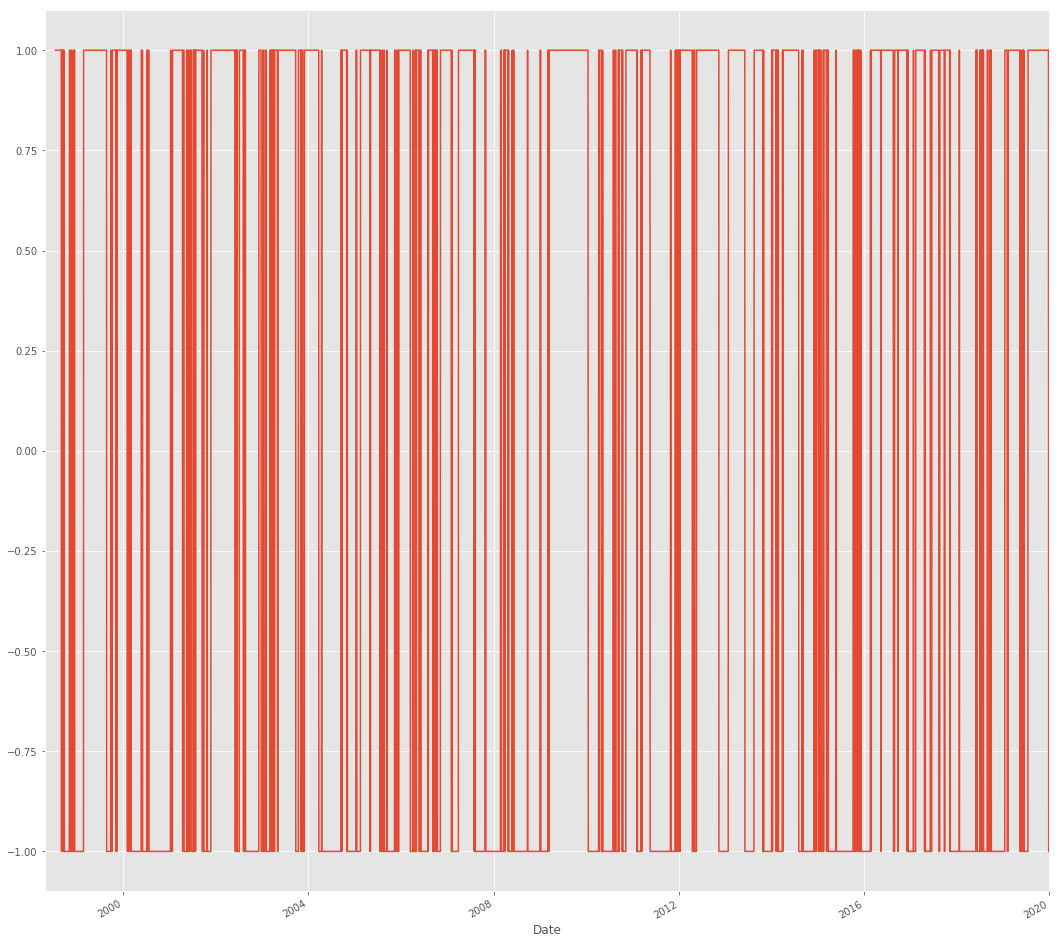

In [43]:
import numpy as np
hold = pd.Series(np.nan, index=buy.index)
hold[buy] = 1
hold[sell] = -1
hold.ffill(inplace=True)
hold.plot()


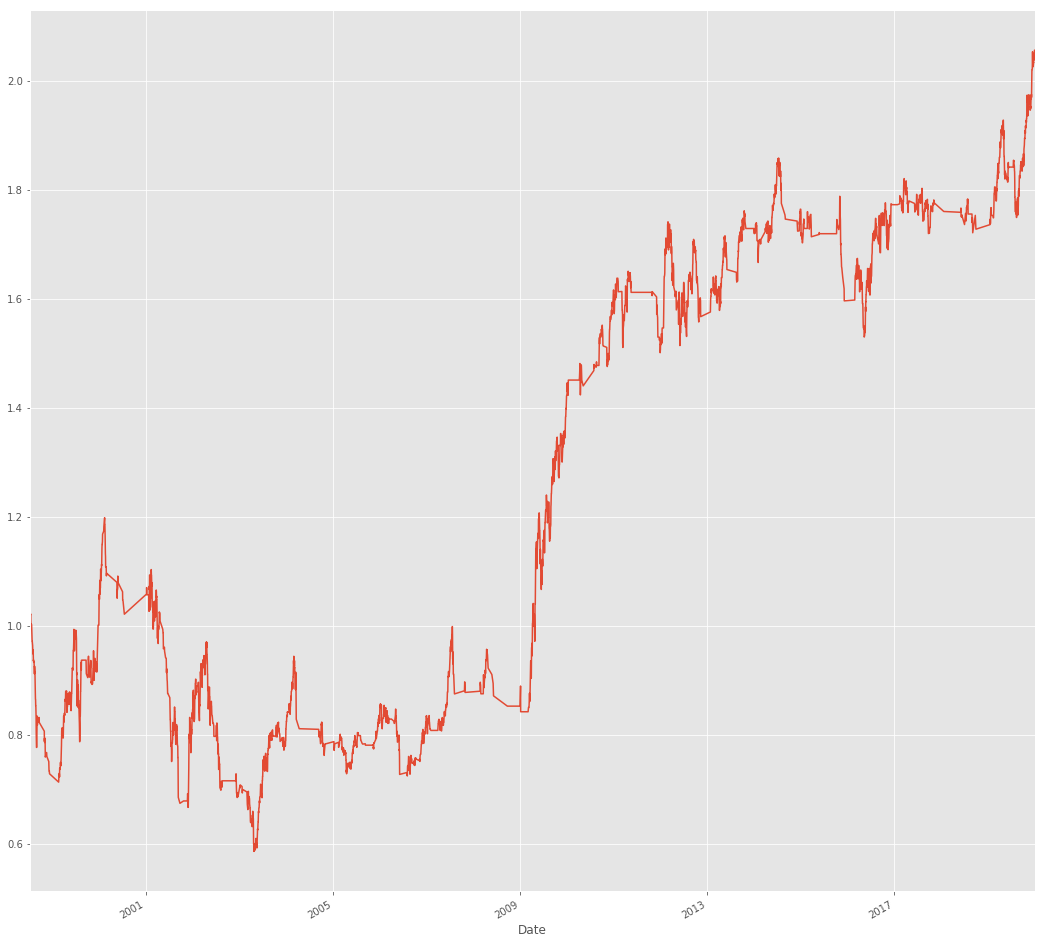

In [44]:
twii = adjclose['TSEC weighted index'][buy.index]

pct_change = twii.pct_change()
pct_ratio = (pct_change.shift(-1)+1) # 今天到明天的價格變化

pct_ratio.fillna(1)[hold == 1].cumprod().plot()
